## Selvakumar G (22MAI1004) 
## Lab 3 Comparison of MP Neuron and Perceptron

In [53]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from random import randint
from sklearn.metrics import accuracy_score

In [54]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [55]:
train_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [56]:
train_df.shape

(891, 12)

In [57]:
X = train_df.drop(columns=["Survived", "Name", "Sex", "Age", "Ticket", "Cabin", "Embarked"])

In [58]:
X.head()

,PassengerId,Pclass,SibSp,Parch,Fare
0,1,3,1,0,7.2500
1,2,1,1,0,71.2833
2,3,3,0,0,7.9250
3,4,1,1,0,53.1000
4,5,3,0,0,8.0500


In [59]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   SibSp        891 non-null    int64  
 3   Parch        891 non-null    int64  
 4   Fare         891 non-null    float64
dtypes: float64(1), int64(4)
memory usage: 34.9 KB


In [60]:
X.isnull().value_counts()

PassengerId  Pclass  SibSp  Parch  Fare 
False        False   False  False  False    891
dtype: int64

In [61]:
y = train_df['Survived']

In [62]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [63]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [64]:
train_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [65]:
train_df.groupby('Survived').mean()

/var/folders/nd/q79n0hd51vqcq6swmwgkc95w0000gn/T/ipykernel_7680/2966032617.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  train_df.groupby('Survived').mean()


,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

In [67]:
print(X.shape, X_train.shape, X_test.shape)

(891, 5) (757, 5) (134, 5)


In [68]:
print(y.shape, y_train.shape, y_test.shape)

(891,) (757,) (134,)


In [69]:
print(y.mean(), y_train.mean(), y_test.mean())

0.3838383838383838 0.37780713342140027 0.417910447761194


In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.15, 
                                                    stratify = y,
                                                    random_state=42,
                                                    )

##### Stratify is used to return the equal proportions for the class labels of y

In [71]:
print(y.mean(), y_train.mean(), y_test.mean())

0.3838383838383838 0.3844121532364597 0.3805970149253731


In [72]:
print(X.mean(), X_train.mean(), X_test.mean())

PassengerId    446.000000
Pclass           2.308642
SibSp            0.523008
Parch            0.381594
Fare            32.204208
dtype: float64 PassengerId    444.726552
Pclass           2.305152
SibSp            0.505945
Parch            0.384412
Fare            31.612147
dtype: float64 PassengerId    453.194030
Pclass           2.328358
SibSp            0.619403
Parch            0.365672
Fare            35.548911
dtype: float64


In [73]:
x_binarised_train = X_train.apply(pd.cut, bins=2, labels=[1,0])

In [74]:
x_binarised_train

,PassengerId,Pclass,SibSp,Parch,Fare
400,1,0,1,1,1
122,1,1,1,1,1
358,1,0,1,1,1
626,0,1,1,1,1
874,0,1,1,1,1
...,...,...,...,...,...
537,0,1,1,1,1
736,0,0,1,1,1
462,0,1,1,1,1
347,1,0,1,1,1


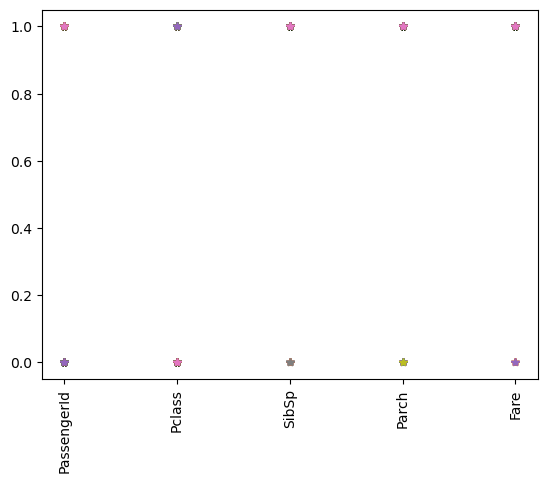

In [75]:
plt.plot(x_binarised_train.T, '*')
plt.xticks(rotation='vertical')
plt.show()

In [76]:
x_binarised_test = X_test.apply(pd.cut, bins=2, labels=[1,0])

In [77]:
x_binarised_test = x_binarised_test.values
x_binarised_train = x_binarised_train.values

In [78]:
type(x_binarised_train), type(x_binarised_test)

(numpy.ndarray, numpy.ndarray)

In [79]:
b = 3

i = randint(0, x_binarised_train.shape[0])

print("For row", i)

if (np.sum(x_binarised_train[100, :]) >= b):
    print("MP Neuron inference is Survived")
else:
    print("MP Neuron inference is Not Survived")

if (y_train[i] == 1):
    print("Ground Truth is Survived")
else:
    print("Ground truth is Not Survived")

For row 536
MP Neuron inference is Survived


KeyError: 536

In [80]:
b = 3

y_pred_train = []
accurate_rows = 0

for x, y in zip(x_binarised_train, y_train):
    y_pred = (np.sum(x) >= b)
    y_pred_train.append(y_pred)
    accurate_rows += (y == y_pred)

print(accurate_rows, accurate_rows/x_binarised_train.shape[0])

301 0.39762219286657857


In [82]:
for b in range(x_binarised_train.shape[1] + 1):
    y_pred_train = []
    accurate_rows = 0

    for x, y in zip(x_binarised_train, y_train):
        y_pred = (np.sum(x) >= b)
        y_pred_train.append(y_pred)
        accurate_rows += (y == y_pred)

    print(b, accurate_rows, accurate_rows/x_binarised_train.shape[0])

0 291 0.3844121532364597
1 291 0.3844121532364597
2 291 0.3844121532364597
3 301 0.39762219286657857
4 418 0.5521796565389696
5 477 0.6301188903566711


In [83]:
b = 6

y_pred_test = []

for x in x_binarised_test:
    y_pred = (np.sum(x) >= b)
    y_pred_test.append(y_pred)
    
accuracy = accuracy_score(y_pred_test, y_test)
print(b,accuracy)

6 0.6194029850746269


### MP Neuron Model

In [84]:
class MPNeuron:
    
    def __init__(self):
        self.b = None
    
    def model(self, x):
        return(sum(x) >= self.b)
    
    def predict(self, X):
        Y = []
        for x in X:
            result = self.model(x)
            Y.append(result)
        return np.array(Y)
    
    def fit(self, X, Y):
        accuracy = {}
        
        for b in range(X.shape[1] + 1):
            self.b = b
            Y_pred = self.predict(X)
            accuracy[b] = accuracy_score(Y_pred, Y)
        
        best_b = max(accuracy,key = accuracy.get)
        self.b = best_b
        
        print('Optimal Value of  is', best_b)
        print('Highest accuracy is',accuracy[best_b])

In [85]:
mp_neuron = MPNeuron()
mp_neuron.fit(x_binarised_train, y_train)

Optimal Value of  is 5
Highest accuracy is 0.6301188903566711


In [86]:
Y_test_pred = mp_neuron.predict(x_binarised_test)
accuracy_test = accuracy_score(Y_test_pred, y_test)

In [87]:
print(accuracy_test)

0.6044776119402985


### Perceptron Model

In [88]:
from sklearn.linear_model import Perceptron

In [89]:
perceptron = Perceptron()
perceptron.fit(x_binarised_train, y_train)

Perceptron()

In [90]:
y_prec_pred = perceptron.predict(x_binarised_test)

In [92]:
accuracy_test1 = accuracy_score(y_prec_pred, y_test)
accuracy_test1

0.417910447761194

In [93]:
import numpy as np
#
# Perceptron implementation
#
class CustomPerceptron(object):
     
    def __init__(self, n_iterations=100, random_state=1, learning_rate=0.01):
        self.n_iterations = n_iterations
        self.random_state = random_state
        self.learning_rate = learning_rate
 
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.coef_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_ = []
        for _ in range(self.n_iterations):
            errors = 0
            for xi, expected_value in zip(X, y):
                predicted_value = self.predict(xi)
                self.coef_[1:] = self.coef_[1:] + self.learning_rate * (expected_value - predicted_value) * xi
                self.coef_[0] = self.coef_[0] + self.learning_rate * (expected_value - predicted_value) * 1
                update = self.learning_rate * (expected_value - predicted_value)
                errors += int(update != 0.0)
            self.errors_.append(errors)
    '''
    Net Input is sum of weighted input signals
    '''
    def net_input(self, X):
            weighted_sum = np.dot(X, self.coef_[1:]) + self.coef_[0]
            return weighted_sum
     
    '''
    Activation function is fed the net input and the unit step function
    is executed to determine the output.
    '''
    def activation_function(self, X):
            weighted_sum = self.net_input(X)
            return np.where(weighted_sum >= 0.0, 1, 0)
     
    '''
    Prediction is made on the basis of output of activation function
    '''
    def predict(self, X):
        return self.activation_function(X)
     
    '''
    Model score is calculated based on comparison of
    expected value and predicted value
    '''
    def score(self, X, y):
        misclassified_data_count = 0
        for xi, target in zip(X, y):
            output = self.predict(xi)
            if(target != output):
                misclassified_data_count += 1
        total_data_count = len(X)
        self.score_ = (total_data_count - misclassified_data_count)/total_data_count
        return self.score_

In [94]:
ppn = CustomPerceptron()

In [95]:
ppn.fit(x_binarised_train, y_train)

In [96]:
y_ppn_pred = perceptron.predict(x_binarised_test)

In [97]:
accuracy_test2 = accuracy_score(y_ppn_pred, y_test)
accuracy_test2

0.417910447761194

### Accuracy Comparison

In [98]:
scores = [accuracy_test, accuracy_test1, accuracy_test2]

In [99]:
labels = ['MP Neuron Model', 'Perceptron Sklearn', 'Perceptron Custom']

In [101]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Accuracy Score Range')

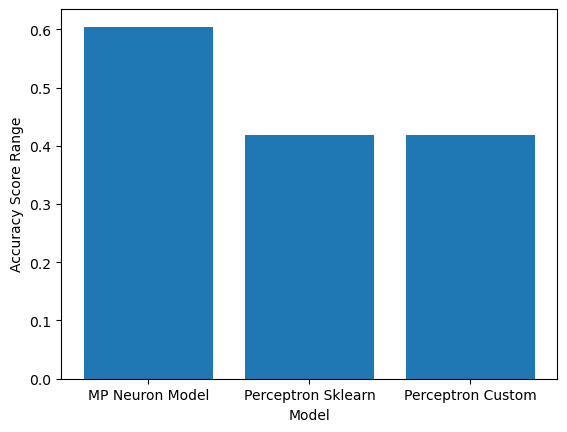

In [108]:
plt.bar(labels, scores)
plt.xlabel("Model")
plt.ylabel("Accuracy Score Range")